**This notebook presents the results of the model one**
 - Model performances
 - Best model and its hyper parameters
 - Testing the model performances

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import joblib

from sklearn.metrics import 

In [2]:
base_url = !pwd
base_url = base_url[0]
result_path = os.path.normpath(os.path.join(base_url, '..', 'BatteryProject', 'ModelTwo', 'best_model', 'models_record.csv'))
result_path

'/home/romainj/code/RomainJupille/wagon/Projet_batteries/BatteryProject/BatteryProject/ModelTwo/best_model/models_record.csv'

## Results summary

### Results table

In [3]:
results_df = pd.read_csv(result_path).drop(columns = ['Unnamed: 0'])
results_df

,Try_ID,deep,offset,Features_disc_capa,Features_dis_ener,Features_char_capa,Features_eff_ener,Features_char_ener,Features_dc_res,Features_temp_avg,...,Metrics_train_eval,Metrics_validation_eval,Metrics_test_eval,Metrics_training_time,Metrics_epochs,HyperParams_unit_type,HyperParams_n_units,HyperParams_n_layer,HyperParams_dropout_rate,HyperParams_dropout_layer
0,1,40,20,X,X,X,X,X,X,X,...,133.137466,124.175156,NaN,299.817230,74,LSTM,4,2,0.2,True
1,2,40,20,X,X,X,X,X,X,X,...,140.287521,114.931793,NaN,510.918679,122,LSTM,4,2,0.3,True
2,3,40,20,X,X,X,X,X,X,X,...,136.753708,107.963730,NaN,564.190003,90,LSTM,4,3,0.2,True
3,4,40,20,X,X,X,X,X,X,X,...,171.190292,163.182724,NaN,498.757485,78,LSTM,4,3,0.3,True
4,5,40,20,X,X,X,X,X,X,X,...,139.331650,88.480217,NaN,363.565272,86,LSTM,5,2,0.2,True
5,6,40,20,X,X,X,X,X,X,X,...,129.557938,114.490936,NaN,421.335916,95,LSTM,5,2,0.3,True
6,7,40,20,X,X,X,X,X,X,X,...,120.917702,122.313721,NaN,803.796381,124,LSTM,5,3,0.2,True
7,8,40,20,X,X,X,X,X,X,X,...,130.010544,126.530365,NaN,484.084331,74,LSTM,5,3,0.3,True
8,9,40,40,X,X,X,X,X,X,X,...,151.506409,145.183899,NaN,276.881849,127,LSTM,4,2,0.2,True
9,10,40,40,X,X,X,X,X,X,X,...,188.181641,160.810806,NaN,348.314061,161,LSTM,4,2,0.3,True


### Results curve

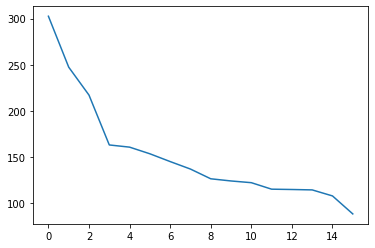

In [4]:
plt.plot(results_df['Metrics_validation_eval'].sort_values(ascending = False).values)

## Impact of features on the model

### Impact of 'offset'

In [10]:
tested_feature ='offset'
results_df[[tested_feature,'Metrics_validation_eval']].groupby(by = tested_feature).mean()

,Metrics_validation_eval
offset,
20,120.258580
40,184.897115


In average a smaller offset helps to model a lot.
This result makes sens since a smaller offset leads to a higher number  of samples (even if samples overlap)

### Impact of the number of units

In [12]:
tested_feature ='HyperParams_n_units'
results_df[[tested_feature,'Metrics_validation_eval']].groupby(by = tested_feature).mean()

,Metrics_validation_eval
HyperParams_n_units,
4,156.989252
5,148.166443


Increasing the number of units in the RNN seems to improve the model performance. 
However the impact is not significant.

### Impact of the number of layers

In [13]:
tested_feature ='HyperParams_n_layer'
results_df[[tested_feature,'Metrics_validation_eval']].groupby(by = tested_feature).mean()

,Metrics_validation_eval
HyperParams_n_layer,
2,138.849665
3,166.306030


Increasing the number of layer has a negative impact on the model.
The model probably becomes too complex, and struggle to learn

### Impact of the number of dropout rate

In [15]:
tested_feature ='HyperParams_dropout_rate'
results_df[[tested_feature,'Metrics_validation_eval']].groupby(by = tested_feature).mean()

,Metrics_validation_eval
HyperParams_dropout_rate,
0.2,169.417592
0.3,135.738103


A higher dropout rate seems to increase the model performance.

### Best model

In [28]:
best_model = results_df.sort_values(by='Metrics_validation_eval', ascending = True).iloc[0,:]
best_model

Try_ID                                5
deep                                 40
offset                               20
Features_disc_capa                    X
Features_dis_ener                     X
Features_char_capa                    X
Features_eff_ener                     X
Features_char_ener                    X
Features_dc_res                       X
Features_temp_avg                     X
Features_temp_min                     X
Features_temp_max                     X
Metrics_baseline             323.675961
Metrics_train_eval            139.33165
Metrics_validation_eval       88.480217
Metrics_test_eval                   NaN
Metrics_training_time        363.565272
Metrics_epochs                       86
HyperParams_unit_type              LSTM
HyperParams_n_units                   5
HyperParams_n_layer                   2
HyperParams_dropout_rate            0.2
HyperParams_dropout_layer          True
Name: 4, dtype: object

In [27]:
model_id = str(best_model['Try_ID'])
for i in range(4-len(model_id)):
    model_id = ''.join(['0',model_id])
model_id

'0005'

## Test of the best model

### Test of random samples

In [29]:
base_url = !pwd
base_url = base_url[0]

raw_data_path = os.path.normpath(os.path.join(base_url, '..', '..', 'TransformedData', 'summary_discharge_capacity.csv'))

bc_path = os.path.normpath(os.path.join(base_url, '..', 'BatteryProject', 'ModelTwo', 'best_model', f"bc_{model_id}.csv"))


X_test_path = os.path.normpath(os.path.join(base_url, '..', 'BatteryProject', 'ModelTwo','best_model', f"X_test_{model_id}.csv"))
X_test_scaled_path = os.path.normpath(os.path.join(base_url, '..', 'BatteryProject', 'ModelTwo', 'best_model', f"X_test_scaled_{model_id}.csv"))
y_test_path = os.path.normpath(os.path.join(base_url, '..', 'BatteryProject', 'ModelTwo', 'best_model' , f"y_test_{model_id}.csv"))
model_path = os.path.normpath(os.path.join(base_url, '..', 'BatteryProject', 'ModelTwo', 'best_model' , f"model_{model_id}.joblib"))

In [57]:
deep = best_model['deep']
n_feature = np.count_nonzero(best_model.values == 'X') + 1

df_raw_data = pd.read_csv(raw_data_path)
df_barcode = pd.read_csv(bc_path, header = None)

X_test_scaled = np.genfromtxt(X_test_scaled_path, delimiter = ',')
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0],deep,n_feature)

X_test = np.genfromtxt(X_test_path, delimiter = ',')
X_test = X_test.reshape(X_test.shape[0],deep,n_feature)


model = joblib.load(model_path)
y_test =  pd.read_csv(y_test_path, header = None)

predictions = model.predict(X_test_scaled)

**RUN THE CELL BELLOW TO TEST THE MODEL WITH RANDOM SAMPLES**

Random number of the tested sample: 172
Barcode of the sample: el150800737334
Prediction of life-cycles left: 646
True number of life-cycles left: 1236
Model error: 590


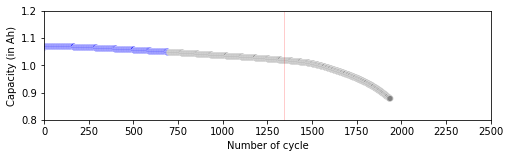

In [74]:
n_features = 4
deep = 40

n = np.random.randint(0,X_test_scaled.shape[0])
y_pred = int(predictions[n,:])
y_true = int(y_test.iloc[n,0])
barcode = df_barcode.iloc[n,0]
last_cycle = int(X_test[n,-1,-1])

print(f'Random number of the tested sample: {n}')
print(f'Barcode of the sample: {barcode}')
print(f'Prediction of life-cycles left: {y_pred}')
print(f'True number of life-cycles left: {y_true}')
print(f'Model error: {abs(y_true-y_pred)}')

fig, axs = plt.subplots(figsize=(8,2))

data = df_raw_data[df_raw_data['barcode'] == barcode]
sns.scatterplot(y = data.iloc[0,1:last_cycle+1].fillna(0), x =np.arange(0,last_cycle,1), ax = axs, color = 'blue', alpha = 0.5)
sns.scatterplot(y = data.iloc[0,1+last_cycle:].fillna(0), x =np.arange(last_cycle,3000,1), ax = axs, color = 'grey', alpha = 0.5)
sns.lineplot(y = [0.8, 1.2], x = [last_cycle+y_pred,last_cycle+y_pred],color = 'red')
axs.set_ylim(0.8,1.2)
axs.set_yticks([0.8,0.9,1.0,1.1,1.2])
axs.set_xlim(0,2500)
axs.set_xticks(range(0,2501,250))
axs.set_ylabel('Capacity (in Ah)')
axs.set_xlabel('Number of cycle')
axs.tick_params(axis='both', which='major', labelsize=10)

### Global performance of the model

#### global performance

**RMSE**

In [101]:
y_pred = predictions
y_true = y_test.values
rmse = round(np.sqrt(np.mean(np.square((y_true - y_pred)))),1)

In [102]:
print(f'The model rmse is {rmse}')

The model rmse is 211.7


**Average % error**

In [135]:
percent_error = round(np.mean(np.abs(y_pred - y_true)/y_true)*100,1)

In [136]:
print(f'In average the model makes a {percent_error}% error on the number of life-cycles left')

In average the model makes a 21.8% error on the number of life-cycles left


#### Performance for small life-cycles values

**RMSE**

In [115]:
y_pred_small = y_pred[y_true <600]
y_true_small = y_true[y_true <600]
rmse_small = round(np.sqrt(np.mean(np.square((y_pred_small - y_true_small)))),1)

In [116]:
print(f'For batteries that have less than 600 cycles left, the model rmse is {rmse_small}')

For batteries that have less than 600 cycles left, the model rmse is 75.3


**Average % error**

In [133]:
percent_error_small = round(np.mean(np.abs(y_pred_small - y_true_small)/y_true_small)*100,1)

In [134]:
print(f'{percent_error_small}% error in average when batteries have less than 600 cycles left')

19.7% error in average when batteries have less than 600 cycles left


#### Performance for high life-cycles values

**RMSE**

In [128]:
y_pred_high = y_pred[y_true >= 600]
y_true_high = y_true[y_true >= 600]
rmse_high = round(np.sqrt(np.mean(np.square((y_pred_high - y_true_high)))),1)

In [129]:
print(f'For samples where the battery has more than 600 cycles left, the model rmse is {rmse_high}')

For batteries that have less than 600 cycles left, the model rmse is 381.6


**Average % error**

In [131]:
percent_error_high = round(np.mean(np.abs(y_pred_high - y_true_high)/y_true_high)*100,1)

In [132]:
print(f'{percent_error_high}% error in average when batteries have more than 600 cycles left')

27.1% error in average when batteries have more than 600 cycles left
